In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler    
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


In [24]:
pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 3\Data\student_dropout.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_10164\1621891382.py:1: SyntaxWarning: invalid escape sequence '\A'
  pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 3\Data\student_dropout.csv")


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [25]:
df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 3\Data\student_dropout.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_10164\1104734844.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 3\Data\student_dropout.csv")


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Marital status                                   4424 non-null   int64  
 1   Application mode                                 4424 non-null   int64  
 2   Application order                                4424 non-null   int64  
 3   Course                                           4424 non-null   int64  
 4   Daytime/evening attendance	                      4424 non-null   int64  
 5   Previous qualification                           4424 non-null   int64  
 6   Previous qualification (grade)                   4424 non-null   float64
 7   Nacionality                                      4424 non-null   int64  
 8   Mother's qualification                           4424 non-null   int64  
 9   Father's qualification        

In [27]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [34]:
x = df.drop("Target",axis=1)
y = df["Target"]

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state= 3 )

In [32]:
model = RandomForestClassifier( random_state=3)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=3)

In [41]:
y_pred = model.predict(x_test)

Accuracy Score = 0.7785310734463277
[[193  25  42]
 [ 30  62  70]
 [ 10  19 434]] None


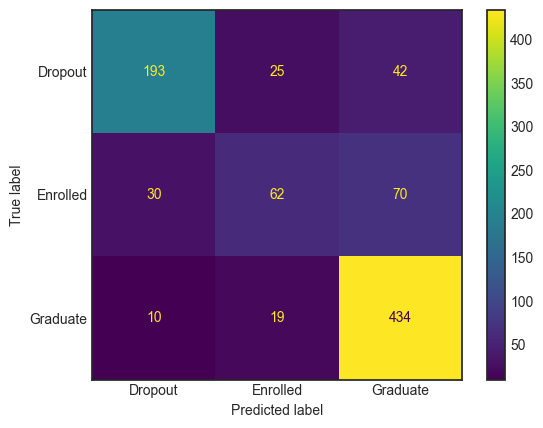

In [52]:
accuracy = accuracy_score(y_test , y_pred)
print( f"Accuracy Score = {accuracy}")

cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(confusion_matrix(y_test, y_pred),plt.style.use( 'seaborn-v0_8-white'))


In [63]:

cv_scores = cross_val_score(model , x, y, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.77853107 0.7819209  0.77627119 0.78305085 0.75791855]
Mean CV Score: 0.7755385126671268
